In [1]:
import requests
import os, sys
import cv2
import json

url = "https://kapi.kakao.com/v1/vision/face/detect"
MYAPI_KEY = '5a826bf53f8508d2cbf62d2199a967dd'
headers = {'Authorization': 'KakaoAK {}'.format(MYAPI_KEY)}

#filename = 'capture.png'

dirname = 'test'
# Create a list of images and a list of corresponding names 
(img, label, name, id) = ([], [], {}, 0) 
for (subdirs, dirs, files) in os.walk(dirname): 
    print("subdirs :", subdirs)
    print("dirs :", dirs)
    print("files :", files)
    for subdir in dirs: 
        print("subdir in dirs :", subdir)
        name[id] = subdir # name[0] = subdir 
        subjectpath = os.path.join(dirname, subdir) 
        for filename in os.listdir(subjectpath): 
            print("filename", filename)
            path = subjectpath + '/' + filename 
            print("path :", path)
            img.append(cv2.imread(path, 0)) 
            label.append(int(id)) 
        id += 1
#print("img", img)
#print("label", label)    
#print("name", name)
#print("id", id)

filename = './' + subdirs + "/" + filename
files = {'file' : open(filename, 'rb')}

response = requests.post(url, headers=headers, files=files)

subdirs : test
dirs : ['linda']
files : []
subdir in dirs : linda
filename linda.png
path : test\linda/linda.png
subdirs : test\linda
dirs : []
files : ['linda.png']


GENDER : female

AGE : 26
pitch -0.09422039985656738
yaw 0.01496712863445282
roll 0.03798501566052437


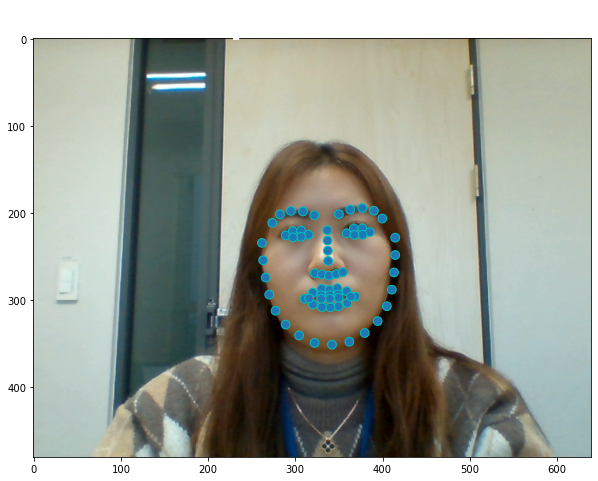

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
%matplotlib inline

result = response.json()
# ========== write all facial info in text file ==========
#with open("json_myimg.txt", "w") as text_file:
    #text_file.write(str(result))
# ========== write all facial info in json file ==========
with open('imageKey_result.json', 'w') as json_file:
    json.dump(result, json_file)
# ========== facial attributes include gender, age ==========
faces = result['result']['faces'][0]
#print(faces)

# ========== gender, age ==========
facial_attr = faces['facial_attributes'] 
#print('\n', facial_attr)
gender = facial_attr['gender']
#print('\n', gender, gender['male'], gender['female'])
if (gender['male'] > gender['female']) :
    gender = 'male'
else :
    gender = 'female'
print('GENDER :', gender)

age = int(facial_attr['age'])
print('\nAGE :', age)


# ========== facial points like right eye, left eye, etc. ==========
facial_points = faces['facial_points'] 
#print('\n', facial_points)

# ========== pitch, yaw, roll ==========
pitch = faces['pitch'] # 상하회전  
print("pitch", pitch)
yaw = faces['yaw'] # 좌우회전 
print("yaw", yaw)
roll = faces['roll']# 목 기준 좌우 꺾이는지  
print("roll", roll)

fig_w, fig_h = result['result']['width'], result['result']['height']
#img = mpimg.imread('capture.png')
img = mpimg.imread(filename)
fig,ax = plt.subplots(figsize=(10,10))

target_obj = ['right_eyebrow', 'left_eyebrow', 'jaw', 'right_eye', 'left_eye', 'nose', 'lip']
for each_obj in target_obj:
    for each in facial_points[each_obj]:
        rect_face = patches.Circle((each[0]*fig_w, each[1]*fig_h), linewidth=1, edgecolor='c')
        ax.add_patch(rect_face)
        annotation = "gender : " + gender + "\n    age : " + str(age)
        plt.figtext(0.36, 0.80, annotation, wrap=True, fontsize=15, color='white')
ax.imshow(img)
plt.show()